# Sageの可視化
Sageのグラフ機能がMATLABやmatplotと大きく異なる点は、関数をそのままグラフにできることでしょう。
例えば、以下の様な2次関数をsageでプロットしてみましょう。

$$
f(x) = 2 x^2 + x -3
$$


In [1]:
f(x) = 2*x^2 + x  -3

関数をグラフで表示するには、plot関数を使います。

plot関数には、先ほど定義した関数f(x)と表示するグラフの範囲を［x, -2, 2］の形式（ｘが-2から2まで）で指定します。

figsize=5を指定しなくてもグラフは表示しますが、デフォルトのサイズが大きいため、figsize=5でグラフの大きさを指定します。

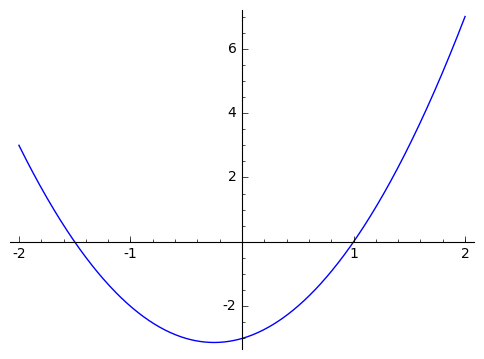

In [2]:
plot(f(x), [x, -2, 2], figsize=5)

関数の定義をshow関数で表示すると分かりやすく表示することができます。

複雑な式もこのように表示することで、記述ミスも簡単に見つけることができます。

In [3]:
show(f(x))

2*x^2 + x - 3

## データのプロット
データのプロットもとても簡単です。

以下の様に各座標点を（）で括り、それを[]で括って座標点の配列を作り、変数dataにセットします。

データのプロットでは、plotの代わりにlist_plot関数を使いします。先ほどと同様にfigsize=5を追加しています。

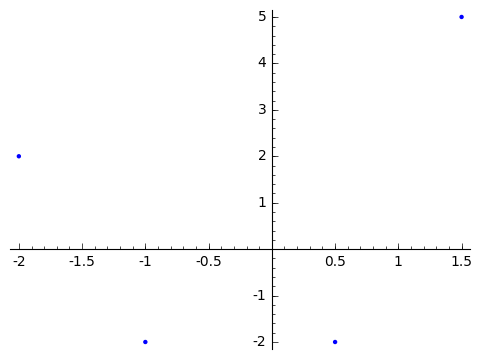

In [4]:
data = [(-2, 2), (-1, -2), (0.5, -2), (1.5, 5)]
list_plot(data, figsize=5)

## グラフの重ね合わせ
sageのグラフの特徴に複数のグラフを重ね合わせが挙げられます。

先ほどのf(x)とdataを重ね合わせてみましょう。

変数f_pltに関数f(x)のプロット結果をセットし、変数d_pltにデータのプロット結果をセットします。color='red'で座標点の色を赤にし、size=25で点の大きさを25ptとしています。

このf_pltとd_pltを足し合わせて、.show()とすると２つのグラフを重ね合わせて表示します。グラフのサイズは、showでfigsize=5と指定することもできます。

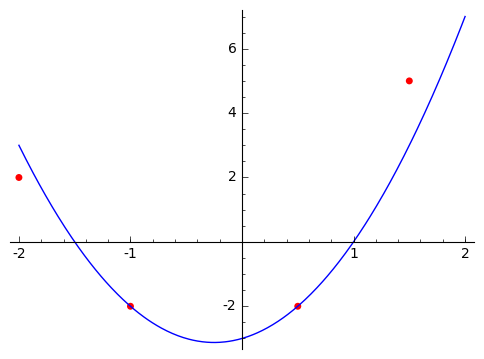

In [5]:
f_plt = plot(f(x), [x, -2, 2])
d_plt = list_plot(data, color='red', size=25)
(f_plt + d_plt).show(figsize=5)

## 数式を扱える
Sageは、数式処理を得意とするシステムですので、式の因数分解や微分・積分も簡単に求めることができます。

f(x)のグラフをみると1.5と1でX軸と交わるので、f(x)を因数分解して確かめてみましょう。

因数分解には、factor関数を使います。

In [6]:
factor(f(x))

(2*x + 3)*(x - 1)

この結果から(2x+3) == 0または(x-1) == 0がX軸と交わるxの値であり、グラフから読み取れる-1.5と1が正しい値であることが分かりました。

## データフィッティング
更にデータにフィットした曲線を求めることができます。

先ほど使ったdataにフットする2次関数を求めてみましょう。

求める2次関数（モデル）を以下の様に定義します。
$$
f(x) = a x^2 + b x + c
$$

Sageでは数式で使う変数をvar関数で定義します。

In [7]:
(a, b, c) = var('a b c')
f(x) = a*x^2 + b*x + c
show(f(x))

a*x^2 + b*x + c

find_fit関数は、引数にデータ、モデルを渡すとデータにフィットするモデルの変数の値を求めてくれます。

In [8]:
find_fit(data, f)

[a == 2.200000000002617, b == 1.82413793103628, c == -2.9189655172499265]

フィットした2次関数をプロットしたいと思ったら、求まったa, b, cの値を使って関数を定義しなければなりませんが、
solution_dict=Trueオプションを付けてfind_fit関数を呼び出し、その結果を変数solにセットすると求まったa, b, cの値が辞書(dict)として返されます。

In [9]:
sol = find_fit(data, f, solution_dict=True)
sol

{b: 1.82413793103628, c: -2.9189655172499265, a: 2.200000000002617}

substituteメソッドにa, b, cの値がセットされた辞書solを渡すとf(x)のa, b, cの値を辞書の値に置き替えてくれます。この戻り値をg(x)とすると以下の様になります。

In [10]:
g(x) = f.substitute(sol)
show(g(x))

2.200000000002617*x^2 + 1.82413793103628*x - 2.9189655172499265

f(x)と同様にg(x)の関数の線を緑色でプロットし、f(x), data, g(x)のプロットを重ね合わせて表示すると以下の様になります。

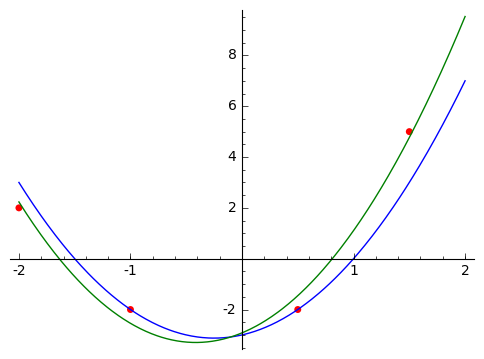

In [11]:
g_plt = plot(g(x), [x, -2, 2], color='green')
(f_plt+d_plt+g_plt).show(figsize=5)